# About this Notebook:

Here we will be performing Data Cleaning and EDA

#  About the dataset:

**The columns can be further divided into the 4 feature groups (Place, Product, Promotion, People)**
1. People
1. Place
1. Product
1. Promotion

**People**

1.  ID: Customer's unique identifier
1.  Year_Birth: Customer's birth year
1.  Education: Customer's education level
1.  Marital_Status: Customer's marital status
1.  Income: Customer's yearly household income
1.  Kidhome: Number of children in customer's household
1.  Teenhome: Number of teenagers in customer's household
1.  Dt_Customer: Date of customer's enrollment with the company
1.  Recency: Number of days since customer's last purchase
1.  Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Product**

1.  MntWines: Amount spent on wine in last 2 years
1.  MntFruits: Amount spent on fruits in last 2 years
1.  MntMeatProducts: Amount spent on meat in last 2 years
1.  MntFishProducts: Amount spent on fish in last 2 years
1.  MntSweetProducts: Amount spent on sweets in last 2 years
1.  MntGoldProds: Amount spent on gold in last 2 years

**Promotion**<br>
1.  NumDealsPurchases: Number of purchases made with a discount
1.  AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
1.  AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
1.  AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
1.  AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
1.  AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
1.  Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

1.  NumWebPurchases: Number of purchases made through the company’s website
1.  NumCatalogPurchases: Number of purchases made using a catalogue
1.  NumStorePurchases: Number of purchases made directly in stores
1.  NumWebVisitsMonth: Number of visits to company’s website in the last month


# Imports and Functions creation

In [1]:
import numpy as np 
import pandas as pd 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Visualisation:
import seaborn               as sns
import matplotlib.pyplot     as plt
sns.set_theme(style="whitegrid")


In [2]:
#Showing missing, duplicates, shape, dtypes
def df_summary(df):
    print(f"Shape(col,rows): {df.shape}")
    print(f"Number of duplicates: {df.duplicated().sum()}")
    print('---'*20)
    print(f'Number of each unqiue datatypes:\n{df.dtypes.value_counts()}')
    print('---'*20)
    print("Columns with missing values:")
    isnull_df = pd.DataFrame(df.isnull().sum()).reset_index()
    isnull_df.columns = ['col','num_nulls']
    isnull_df['perc_null'] = ((isnull_df['num_nulls'])/(len(df))).round(2)
    _df_ = isnull_df[isnull_df['num_nulls']>0]
    if _df_.empty:
        print("--No Missing Data--")
    else:
        print(_df_)
        
#Visualisation
##Annotate Barchart
def annotation_fx(my_barchart):
    for each_bar in my_barchart.patches:
        plt.annotate(format(each_bar.get_height(), '.0f'),
                       (each_bar.get_x() + each_bar.get_width() / 2,
                        each_bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points')
        
#Correlation heatmap:
def plot_correlation(df):
    corr = df.corr(numeric_only=True)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(corr,
                   cmap=sns.diverging_palette(220, 20, n=4),
                   annot = True,
                    vmin = -1, vmax = 1,
                    linewidths = 0.5,
                mask = mask
                   )

In [3]:
# Data Import
original_df = pd.read_csv("Data/marketing_campaign.csv", sep="\t")
df = original_df.copy()

# Part 1: Data Cleaning:

Check and address for:
- Missing data
- Duplicated data
- Data types
- Data values

Others:
- Renaming columns
- Analysing outliers

In [4]:
df_summary(df)

Shape(col,rows): (2240, 29)
Number of duplicates: 0
------------------------------------------------------------
Number of each unqiue datatypes:
int64      25
object      3
float64     1
dtype: int64
------------------------------------------------------------
Columns with missing values:
      col  num_nulls  perc_null
4  Income         24       0.01


**Remarks**<br>

- Data has 29 features, 2240 data points
- Among 29 features, 3 of them has string data types, the rest are numerical features
- There is no duplicate data
- **Issue**:
    - Missing Data: 24 data entries (1% of the data) have missing data in 'Income'
    
- **Action Plan**
    - Address Missing data
    - Further analyse and check appropriateness in Data Type and Data Value

## 1.1 Missing Data:

Since the missing data makes up 1% of the dataset, let's drop these data entries.

In [5]:
print(f"Number of data entries before {len(df)}.\n")
df = df.dropna()
print(f"Number of data entries after {len(df)}.\n")


Number of data entries before 2240.

Number of data entries after 2216.



## 1.2 Datatype

In [6]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [7]:
#convert Dt_Customer to date time
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],dayfirst=True)

## 1.3 Data Values

### Datetime Data

In [8]:
max_date = df['Dt_Customer'].max().date()
print(f"Most recent enrollement on {max_date}")

min_date = df['Dt_Customer'].min().date()
print(f"Oldest enrollement on {min_date}")

Most recent enrollement on 2014-06-29
Oldest enrollement on 2012-07-30


### Numerical Data

In [9]:
df.describe().T[['min','max']]

,min,max
ID,0.0,11191.0
Year_Birth,1893.0,1996.0
Income,1730.0,666666.0
Kidhome,0.0,2.0
Teenhome,0.0,2.0
Recency,0.0,99.0
MntWines,0.0,1493.0
MntFruits,0.0,199.0
MntMeatProducts,0.0,1725.0
MntFishProducts,0.0,259.0


**Observation and Remarks**<br>

Observation:
1. No abnormal values (e.g. Year_Birth 2030)
1. Noticed min and max value is the same for column: <code>Z_CostContact</code> and <code>Z_Revenue</code>

**Remarks**
1. Suspect <code>Z_CostContact</code> and <code>Z_Revenue</code> contain same element in the all datarows
    - if so, these unuseful columns are to be dropped

In [10]:
for col in ['Z_CostContact','Z_Revenue']:
    i = df[col].nunique()
    print(f"Column {col}'s number of unique elements: {i}")
    if i==1:
        df.drop(columns = col, inplace=True)
        print(f"Column {col} has been dropped.")

Column Z_CostContact's number of unique elements: 1
Column Z_CostContact has been dropped.
Column Z_Revenue's number of unique elements: 1
Column Z_Revenue has been dropped.


In [11]:
print(f'Number of columns has reduced from {len(original_df.columns)} to {len(df.columns)}.')

Number of columns has reduced from 29 to 27.


### Categorical Data

In [12]:
categorical_col = df.select_dtypes(include = 'object').columns.tolist()
categorical_col

['Education', 'Marital_Status']

In [13]:
ls_ = df[categorical_col].select_dtypes(include = 'object').columns.tolist()
for col in ls_:
    print(f"For column '{col}':\n unique elements include {df[col].unique().tolist()}")

For column 'Education':
 unique elements include ['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']
For column 'Marital_Status':
 unique elements include ['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']


In [14]:
#simplify catergories for Education and Marital Status

#Segmenting education levels in three groups
education_dict = {'Undergrad': ['Basic', '2n Cycle'],
                  'Graduate': ['Graduation'],
                  'Post_grad': ['PhD', 'Master']}

# Create the relationshipstatus_dict 
relationshipstatus_dict = {'Unattached': ['Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'],
                  'Attached': ['Together', 'Married']}

# Map the education_level column to the education categories using the education_dict
df['Education'] = df['Education'].map({v: k for k, lst in education_dict.items() for v in lst})
df['Relationship_status'] = df['Marital_Status'].map({v: k for k, lst in relationshipstatus_dict.items() for v in lst})



In [15]:
ls_ = ['Education','Relationship_status']
for col in ls_:
    print(f"For column '{col}':\n unique elements include {df[col].unique().tolist()}")

For column 'Education':
 unique elements include ['Graduate', 'Post_grad', 'Undergrad']
For column 'Relationship_status':
 unique elements include ['Unattached', 'Attached']


In [16]:
#Drop marital status column
df.drop(columns='Marital_Status',inplace=True)

## 1.4 Rename the columns 
1. <code>Response</code> shall be renamed as <code>AcceptedCmpLast</code> to be consistent other similar columns.
1. <code>Dt_Customer</code> shall be renamed as <code>Enrollment_date</code> for clarity.
1. Rename columns related to product spending for consistency

*Recap*<br>
- <code>AcceptedCmpLast</code>, previously referred as 'Response': 1 if customer accepted the offer in the last campaign, 0 otherwise<br>
- <code>Enrollment_date</code>, previously referred as 'Dt_Customer': Date of customer's enrollment with the company

In [17]:
df.rename(columns={'Response':'AcceptedCmpLast'},inplace=True)

In [18]:
df.rename(columns={'Dt_Customer':'Enrollment_date'},inplace=True)

In [19]:
[col for col in df.columns if 'Mnt' in col]

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [20]:
#rename columns related to product spending for consistency
df.rename(columns =  {'MntWines' : 'MntWinesProducts',
                     'MntFruits' : 'MntFruitsProducts',
                     'MntGoldProds' : 'MntGoldProducts'},
          inplace = True
         )

## 1.5 Outlier

In [21]:
#return dataframe showing outliers only, if value is not outlier will show as Nan
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [22]:
#count number of outlier per column
find_outliers_IQR(df.select_dtypes(include = ['int64','float64'])).count().sort_values()

ID                       0
Kidhome                  0
Teenhome                 0
Recency                  0
NumStorePurchases        0
Year_Birth               3
NumWebPurchases          3
Income                   8
NumWebVisitsMonth        8
Complain                21
NumCatalogPurchases     23
AcceptedCmp2            30
MntWinesProducts        35
NumDealsPurchases       84
AcceptedCmp1           142
AcceptedCmp5           162
AcceptedCmp3           163
AcceptedCmp4           164
MntMeatProducts        174
MntGoldProducts        205
MntFishProducts        222
MntFruitsProducts      246
MntSweetProducts       246
AcceptedCmpLast        333
dtype: int64

**Comments**:<br>

We shall inspect more in detail in the following analysis to determine whether there is significant anomaly in the outliers values.

## Summary of Data Cleaning:

|What is checked|Issue|Action|
|---|---|---|
|Duplication|Absent|NA|
|Missing Data|Found 24 data entries (1% of the data) have missing data in <code>Income</code>| Dropped datarow with missing data|
|Data type|<code>Dt_Customer</code> is found as *object* instead of datetime|Convert <code>Dt_Customer</code> to datetime format|
|Data value|<li>Found 2 columns (<code>Z_CostContact</code> and <code>Z_Revenue</code>) contain same unique elements in all rows</li><li>Found multiple unique elements in categorical columns <code>Education</code> and <code>Marital Status</code>|<li>Dropped <code>Z_CostContact</code> and <code>Z_Revenue</code></li><li>Recategorised <code>Education</code> level into 3 unique groups, and replace <code>Marital Status</code> with <code>Relationship_status</code> (*Attached* vs *Unattached*)</li>|
|Columns names|Some names can be changed to improve clarity|<li>Renamed <code>Response</code> with <code>AcceptedCmpLast</code></li><li>Renamed<code>Dt_Customer</code> with <code>Enrollment_date</code>|
|Outliers|Most columns have presence of outlier|Presence of outliers should be kept in mind as we further analyse the data and subsequently perform clustering|

# PART 2: EDA -  CONSUMER BEHAVIOUR

- Product
- Promotion
- Place

## 2.1 CONSUMER EXPENDITURE OF PRODUCT TYPES
1.  MntWinesProducts: Amount spent on wine in last 2 years
1.  MntFruitsProducts: Amount spent on fruits in last 2 years
1.  MntMeatProducts: Amount spent on meat in last 2 years
1.  MntFishProducts: Amount spent on fish in last 2 years
1.  MntSweetProducts: Amount spent on sweets in last 2 years
1.  MntGoldProducts: Amount spent on gold in last 2 years
1.  TotalAMntspent:Total amount spend in last 2 years (NEW)

In [23]:
# create a list containing the features related to product
product_col = [col for col in df.columns if 'Mnt' in col]

#create a column that sums that amount spent on different product type purchases
df['TotalAMntspent'] = [0]*len(df)

for col in product_col:
    df['TotalAMntspent']  = df['TotalAMntspent']  + df[col]

#append 'TotalAMntspent' to product_col
product_col.append('TotalAMntspent')

In [24]:
df[product_col].describe().T

,count,mean,std,min,25%,50%,75%,max
MntWinesProducts,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
MntFruitsProducts,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0
MntSweetProducts,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.00,262.0
MntGoldProducts,2216.0,43.965253,51.815414,0.0,9.0,24.5,56.00,321.0
TotalAMntspent,2216.0,607.075361,602.900476,5.0,69.0,396.5,1048.00,2525.0


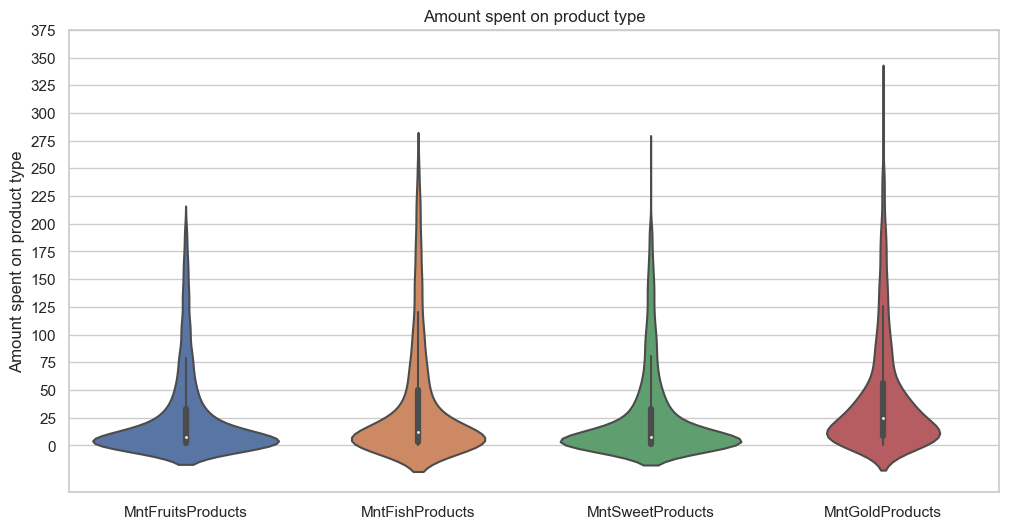

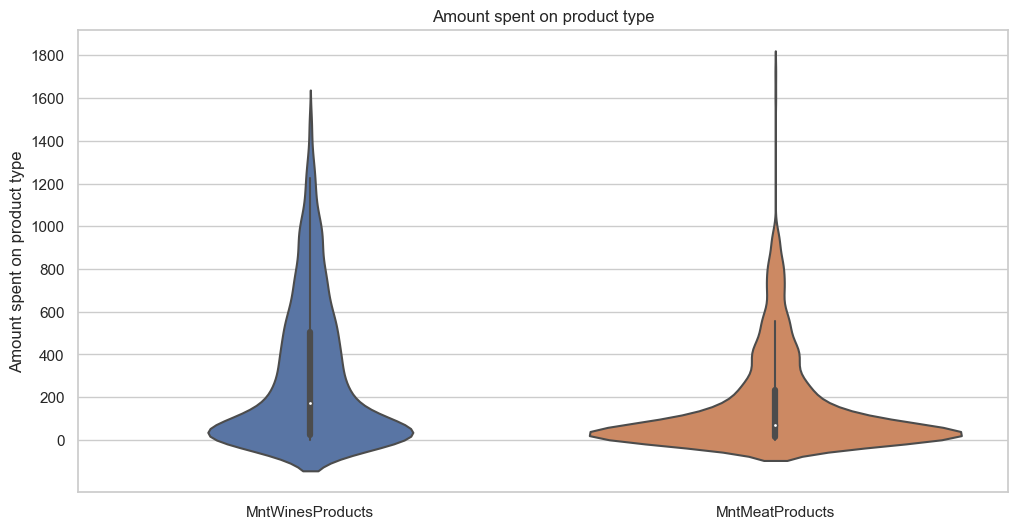

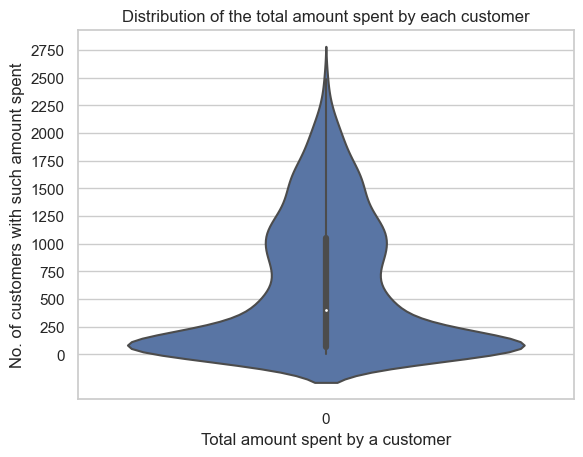

In [25]:
#For better visibility in the chart, we shall view the distribution of Wine and Meat spendings seperately
fig = plt.figure(figsize=(12,6))
sns.violinplot(data=df[['MntFruitsProducts','MntFishProducts','MntSweetProducts','MntGoldProducts']])
plt.ylabel("Amount spent on product type");
plt.title("Amount spent on product type");
plt.yticks(np.arange(0,400,25))
plt.show()
fig = plt.figure(figsize=(12,6))
sns.violinplot(data=df[['MntWinesProducts','MntMeatProducts']])
plt.ylabel("Amount spent on product type");
plt.title("Amount spent on product type");
plt.yticks(np.arange(0,2000,200))
plt.show();

#histogram showing distribution of the total amount spent by a customer
sns.violinplot(df['TotalAMntspent'])
plt.title("Distribution of the total amount spent by each customer")
plt.xlabel("Total amount spent by a customer")
plt.ylabel("No. of customers with such amount spent")
plt.yticks(np.arange(0,3000,250))
plt.show();

#### Remarks:

- Amount customers spent on Wine and Meat are much higher than other products type (IQR)
    - Wine IQR (24 - 505)
    - Meat IQR (16 - 232)
    - Others: IQR about (5 - 40)
- Majority of the customers have total spending <1000 in the last 2 years.
- There is a bulk of customers spending <500 in last 2 years
- There is a bulk of customers spending above 900 in last 2 years


## 2.2: CONSUMER ACCEPTANCE TO CAMPAIGNS OFFERS 
1.  NumDealsPurchases: Number of purchases made with a discount
1.  AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
1.  AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
1.  AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
1.  AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
1.  AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
1.  AcceptedCmpLast: 1 if customer accepted the offer in the last campaign, 0 otherwise
1.  TotalCmpAccepted: Number of offers accepted by customer (NEW)


In [26]:
# create a list containing all the features related to campaigns
cmp_col = [col for col in df.columns if 'Cmp' in col]

#New column TotalCmpAccepted that sums the number of campaigne offers customers accept
df['TotalCmpAccepted'] = [0]*len(df)
for col in  cmp_col:
    df['TotalCmpAccepted']  = df['TotalCmpAccepted'] +df[col]

#Create a list of promotion-related features    
cmp_col.append('TotalCmpAccepted')
promotion_col = cmp_col + ['NumDealsPurchases']

In [27]:
#Statistical description 
df[['TotalCmpAccepted','NumDealsPurchases']].describe()

,TotalCmpAccepted,NumDealsPurchases
count,2216.000000,2216.000000
mean,0.448556,2.323556
std,0.892440,1.923716
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,2.000000
75%,1.000000,3.000000
max,5.000000,15.000000


In [68]:
cmp_col.sort()

In [69]:
cmp_col

['AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmpLast',
 'TotalCmpAccepted']

In [76]:
# Campaign Acceptance rate:
for i in cmp_col:
    accept_rate = df[i].value_counts(normalize = True, sort = False)[1]
    print(f"Acceptance rate for {i} is {(accept_rate*100).round(2)}%")

Acceptance rate for AcceptedCmp1 is 6.41%
Acceptance rate for AcceptedCmp2 is 1.35%
Acceptance rate for AcceptedCmp3 is 7.36%
Acceptance rate for AcceptedCmp4 is 7.4%
Acceptance rate for AcceptedCmp5 is 7.31%
Acceptance rate for AcceptedCmpLast is 15.03%
Acceptance rate for TotalCmpAccepted is 16.65%


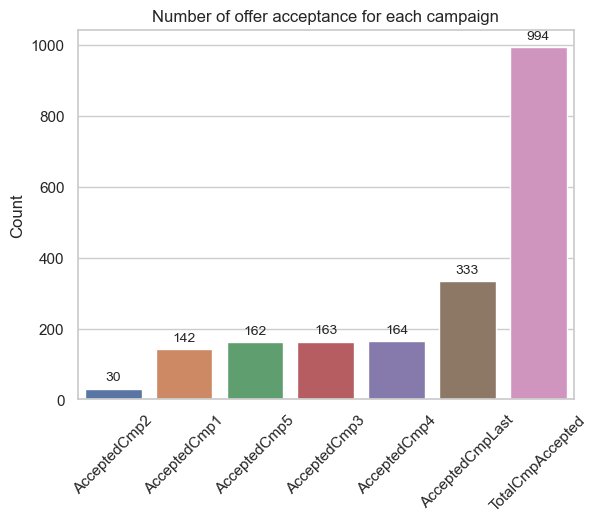

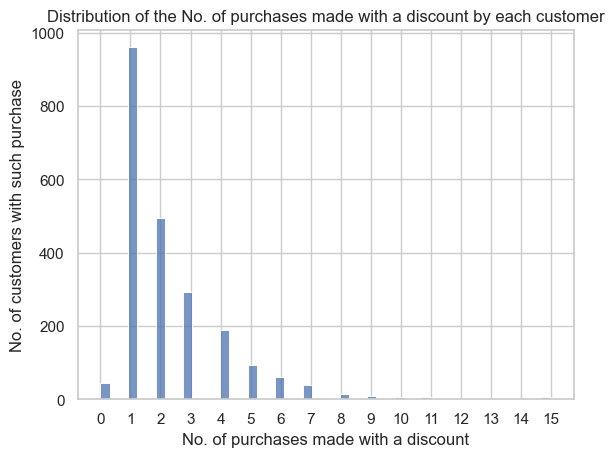

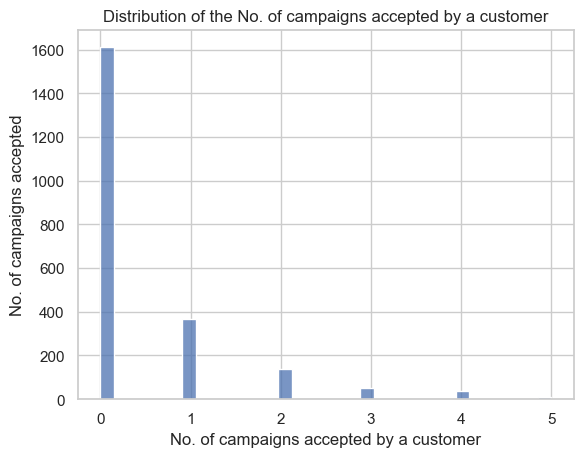

In [28]:
cmp_col = [col for col in df.columns if 'Cmp' in col]

#barchart showing number of acceptance for each campaign and lastly total number of campaigns acceptance
_d = df[cmp_col].sum().sort_values()
chart = sns.barplot(x=_d.index, y=_d.values)
annotation_fx(chart)
chart
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Number of offer acceptance for each campaign")
plt.show();

#histogram showing distribution of the number of purchase with discount by a customer
sns.histplot(df['NumDealsPurchases'])
plt.title("Distribution of the No. of purchases made with a discount by each customer")
plt.xlabel("No. of purchases made with a discount")
plt.ylabel("No. of customers with such purchase")
plt.xticks(range(16));
plt.show();

#histogram showing distribution of the number of campaigns accepted by a customer
sns.histplot(df['TotalCmpAccepted'])
plt.title("Distribution of the No. of campaigns accepted by a customer")
plt.xlabel("No. of campaigns accepted by a customer")
plt.ylabel("No. of campaigns accepted")
plt.xticks(range(0,6));

In [29]:
#Number of customers that did accept any compaigns offers
len(df[df['TotalCmpAccepted']!=0])

605

In [30]:
df['TotalCmpAccepted'].value_counts(normalize=True)

0    0.726986
1    0.166516
2    0.062726
3    0.023014
4    0.016245
5    0.004513
Name: TotalCmpAccepted, dtype: float64

#### Remarks:

1. Out of over 2K customers, the numbers of acceptance of each campaign offer is low:
    - Lowest is Cmp 2 (1% acceptance rate)
    - Avg is about 160 per cmp (~7% acceptance rate)
    - The last Cmp was most successful with 333 acceptance (15% acceptance rate)
    - About 1600 customers (73%) did not accept any campaigns offer.
1. Majority of the customers have at least 1 purchase made with a discount.

## 2.3: CONSUMER PLACE OF PURCHASE
1.  NumWebPurchases: Number of purchases made through the company’s website
1.  NumCatalogPurchases: Number of purchases made using a catalogue
1.  NumStorePurchases: Number of purchases made directly in stores
1.  TotalNumPurchases: Total number of purchases made by a customer (NEW)
1.  NumWebVisitsMonth: Number of visits to company’s website in the last month



In [31]:
#create a list containing the features related to place of purchase (web, catalog and store)
place_col = [col for col in df.columns if ('Num' in col) & ('Purchases' in col)]
place_col.remove('NumDealsPurchases')

In [32]:
df['TotalNumPurchases'] = [0]*len(df)
for col in place_col:
    df['TotalNumPurchases'] = df['TotalNumPurchases'] + df[col]
place_col.append('TotalNumPurchases')  

In [33]:
df[place_col].head()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalNumPurchases
0,8,10,4,22
1,1,1,2,4
2,8,2,10,20
3,2,0,4,6
4,5,3,6,14


In [34]:
df[place_col].describe()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalNumPurchases
count,2216.000000,2216.000000,2216.000000,2216.000000
mean,4.085289,2.671029,5.800993,12.557310
std,2.740951,2.926734,3.250785,7.204611
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,6.000000
50%,4.000000,2.000000,5.000000,12.000000
75%,6.000000,4.000000,8.000000,18.000000
max,27.000000,28.000000,13.000000,32.000000


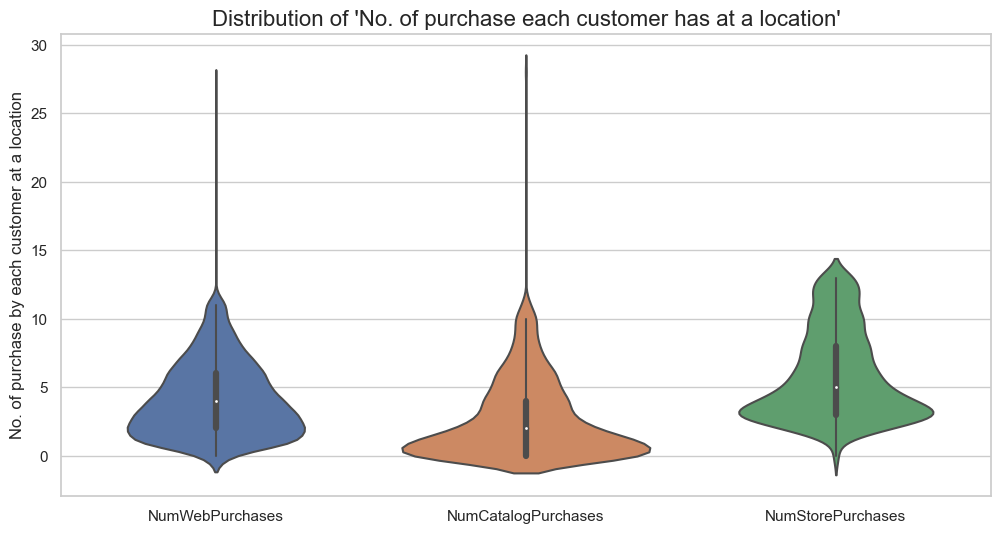

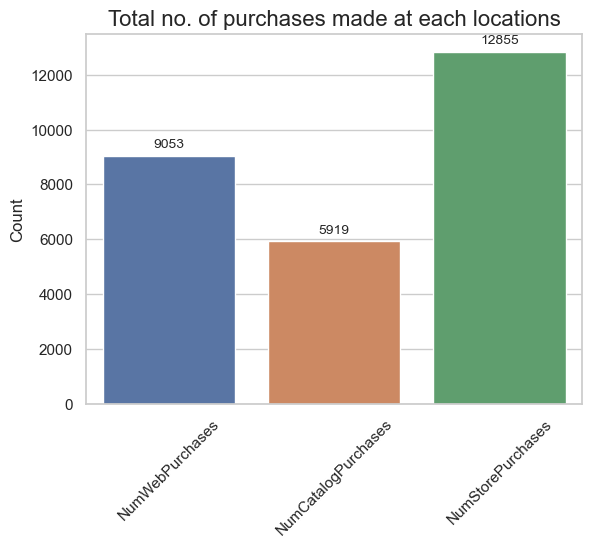

In [35]:
#Visualisation of the purchases pattern at the 3 different locations
locations_ls = place_col[:3]

fig = plt.figure(figsize=(12,6))
sns.violinplot(data=df[locations_ls])
plt.title("Distribution of 'No. of purchase each customer has at a location'",fontsize=16)
plt.ylabel("No. of purchase by each customer at a location")
plt.show();

_d = df[locations_ls].sum()
chart = sns.barplot(x=_d.index, y=_d.values)
annotation_fx(chart)
chart
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Total no. of purchases made at each locations",fontsize=16)
plt.show();

#### Remarks:

- While the Store observed largest number of purchase, and has the most customers making more than 5 purchases at it
- Web and Catalog are where customers who made larger number of total purchases (>15)

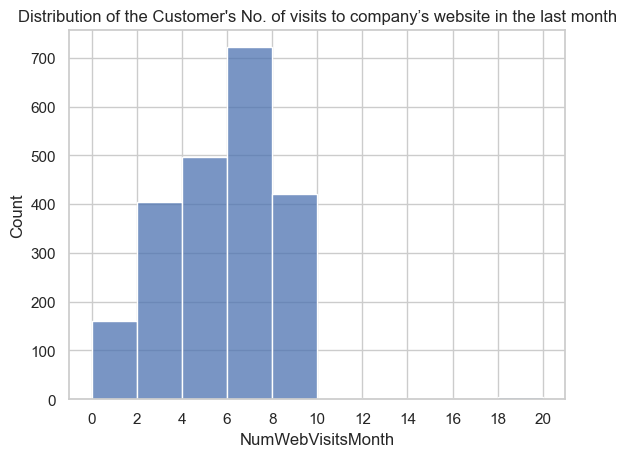

In [36]:
#histogram showing distribution of the total number of purchase made by a customer
sns.histplot(df['NumWebVisitsMonth'], bins = 10)
plt.title("Distribution of the Customer's No. of visits to company’s website in the last month")
plt.xticks(np.arange(0,22,2));

In [37]:
#percentage customers viewing web 4 times or less last month
cond = df['NumWebVisitsMonth']<=4
len(df.loc[cond,'NumWebVisitsMonth'])/len(df)

0.35243682310469315

In [38]:
#percentage customers viewing web 5-10 times last month
cond = (df['NumWebVisitsMonth'] >= 5) &  ( df['NumWebVisitsMonth'] <= 10)
len(df.loc[cond,'NumWebVisitsMonth'])/len(df)

0.6435018050541517

#### Remarks:

In the last month, we see:
- about 25% of the customers view the websites 4 times or less
- a majority (64%) of the customers viewed the websites between 4 to 10 tiems

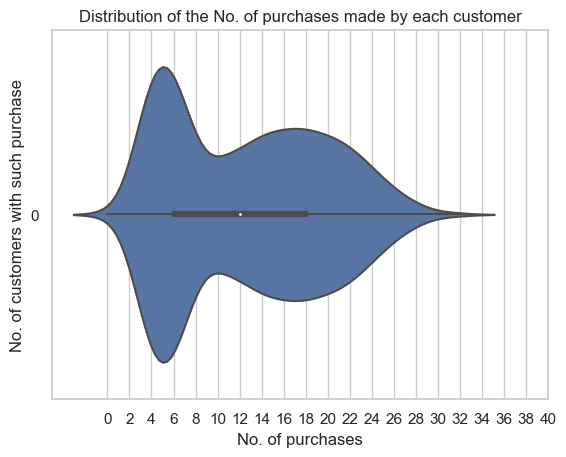

In [39]:
#histogram showing distribution of the total number of purchase made by a customer
sns.violinplot(df['TotalNumPurchases'], orient = 'h')
plt.title("Distribution of the No. of purchases made by each customer")
plt.xlabel("No. of purchases")
plt.ylabel("No. of customers with such purchase")
plt.xticks(np.arange(0,42,2));


#### Remarks:
- There is a bulk of customers making 2-8 purchases in past 2 years
- There is a bulk of customers making 10-25 purchases in past 2 years

## 2.4 CONSUMER BEHAVIOUR SUMMARY

|Behaviour|Description|
|---|---|
|EXPENDITURE|<li>There is a bulk of customers spending <500 in last 2 years<li>There is a bulk of customers spending above 900 in last 2 years<li>There is significantly more expenditure on WINE & MEAT compared to other product types|
|CAMPAIGN OFFERS|<li> Generally acceptance rate for all campaign offers are low (avg 160)<li>73% Customers did not accept any campaigns<li>Last Campaign received the highest acceptance (300+)|
|PLACE OF PUCHASE|<li>Store is the most popular place of purchase (12.8K purchases in last 2years<li>Majority (64%) of customers viewed the website 5-10 times last month<li>There is a bulk of customers making 2-6 purchases in past 2yrs<li>There is a bulk of customers making 10-25 purchases in past 2yrs|


**Changes to the data features**<br>
New columns:
- <code>TotalAMntspent</code>: Total amount spend in last 2 years (NEW)
- <code>TotalCmpAccepted</code>: Number of offers accepted by customer (NEW)
- <code>TotalNumPurchases</code>: Total number of purchases made by a customer (NEW)

# PART 3: EDA -  CONSUMER DEMOGRAPHIC

1.  ID: Customer's unique identifier
1.  Age: Customer's age (NEW)
1.  Education: Customer's education level
1.  Relationship_status: Customer's relationship status
1.  Income: Customer's yearly household income
1.  Kidhome: Number of children in customer's household
1.  Teenhome: Number of teenagers in customer's household
1.  KidTeenhome: Number of children & teenagers in customer's household (NEW)
1.  Days_enrolled: Number of days since customer has been enrolled with the company (NEW)
1.  Recency: Number of days since customer's last purchase
1.  Complain: 1 if the customer complained in the last 2 years, 0 otherwise

In [40]:
people_col = [col for col in df.columns if col not in place_col + product_col + promotion_col]

In [41]:
people_col

['ID',
 'Year_Birth',
 'Education',
 'Income',
 'Kidhome',
 'Teenhome',
 'Enrollment_date',
 'Recency',
 'NumWebVisitsMonth',
 'Complain',
 'Relationship_status']

## 3.1.ENROLLMENT
*Recap*<br>
<code>Enrollment_date</code>: Date of customer's enrollment with the company

In [42]:
max_date = df['Enrollment_date'].max().date()
print(f"Most recent enrollement on {max_date}")

min_date = df['Enrollment_date'].min().date()
print(f"Oldest enrollement on {min_date}")

Most recent enrollement on 2014-06-29
Oldest enrollement on 2012-07-30


In [43]:
#creating a copy of the df for visualisation (without subsequently affecting the df structure)
df_copy = df.copy()
df_copy['enr_month_year'] = pd.to_datetime(df_copy['Enrollment_date'].dt.strftime('%Y-%m'))

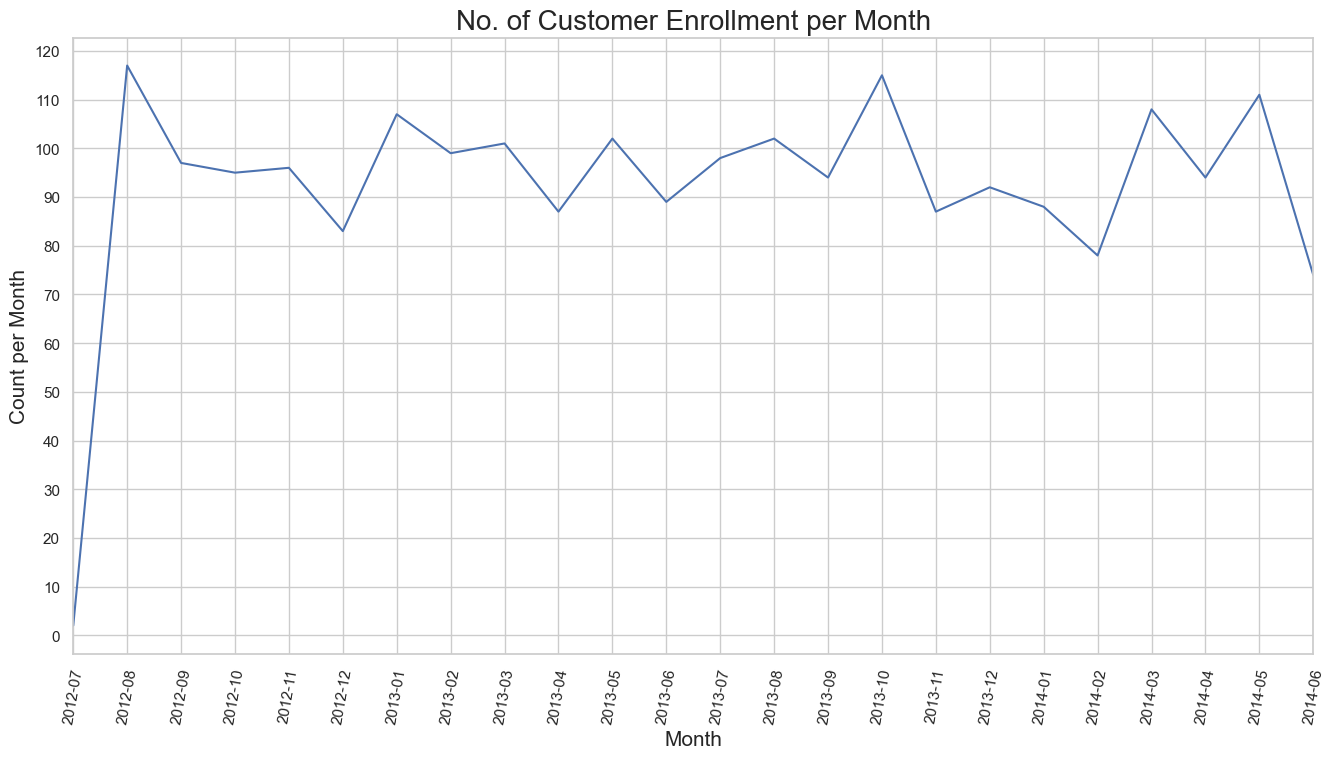

In [44]:
end_date = df_copy['enr_month_year'].max()
start_date = df_copy['enr_month_year'].min()
date_range = pd.date_range(start=f"{start_date}", end=f"{end_date}", freq='MS')

x_label=[dt.strftime('%Y-%m') for dt in date_range]

fig = plt.figure(figsize=(16,8))
_d = df_copy.groupby('enr_month_year')['enr_month_year'].count()
_d.plot()
plt.xticks(date_range,x_label,rotation=80)
plt.yticks(np.arange(0,130,10))
plt.title("No. of Customer Enrollment per Month",fontsize = 20)
plt.ylabel("Count per Month", fontsize = 15)
plt.xlabel("Month", fontsize = 15);

#### Remarks:
- Most of the months observed 90-110 customers enrollment per month

### 3.1.1 Replacing <code>Enrollment_date</code> with <code>Days_enrolled</code>

<code>Enrollment_date</code>: Date of customer's enrollment with the company<br>
<code>Days_enrolled</code>: Number of days since customer has been enrolled with the company (NEW)

In [45]:
# we shall replace Enrollment_date with Days_enrolled
reference_date = pd.Timestamp('2012-07-30')
df['Days_enrolled'] = (df['Enrollment_date'] - reference_date).dt.days

In [46]:
df.drop(columns='Enrollment_date',inplace=True)

## 3.2 YEART OF BIRTH & AGE

In this segment, we will be replacing <code>Year_Birth</code> with <code>Age</code>

In [47]:
df['Age'] = 2014-df['Year_Birth']
people_col.append('Age')
people_col.remove('Year_Birth')
df.drop(columns = 'Year_Birth',inplace=True)

In [48]:
df['Age'].describe()

count    2216.000000
mean       45.179603
std        11.985554
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

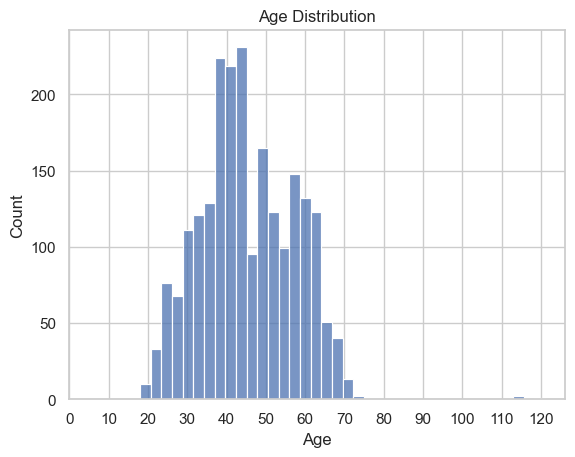

In [49]:
sns.histplot(df['Age'])
plt.xlabel("Age")
plt.xticks(range(0,121,10))
plt.title("Age Distribution");

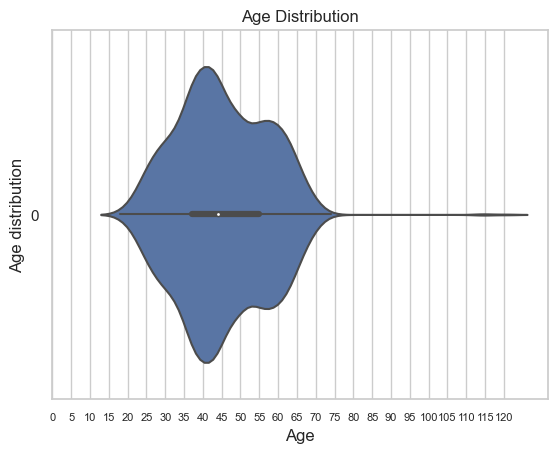

In [51]:
sns.violinplot(df['Age'], orient = 'h')
plt.ylabel("Age distribution");
plt.xlabel("Age")
plt.xticks(range(0,121,5),fontsize =8)
plt.title("Age Distribution");

In [51]:
df.loc[df['Age']>80,'Age']

192    114
239    121
339    115
Name: Age, dtype: int64

#### Remarks:
- The most frequent age ranged around 35 to 50, followed by 55 to 70
- There are a couple of senior customers with age >100

## 3.3 INCOME

In [52]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [53]:
df['Income'].sort_values().tail(10)

646     105471.0
1898    113734.0
655     153924.0
2132    156924.0
1653    157146.0
164     157243.0
1300    157733.0
687     160803.0
617     162397.0
2233    666666.0
Name: Income, dtype: float64

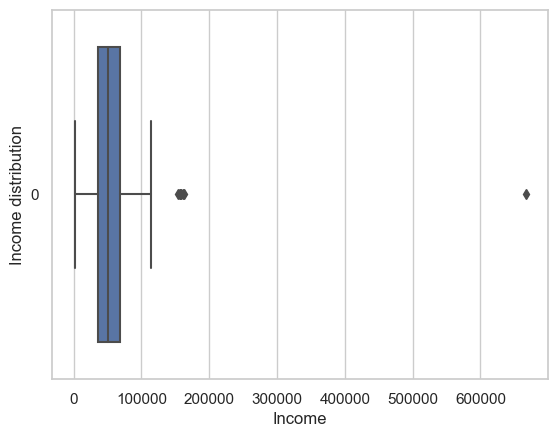

In [54]:
sns.boxplot(df['Income'],orient='h')
plt.ylabel("Income distribution");
plt.xlabel("Income");

**Comment**<br>
- Income 666666 appears to be an abnormaly large outlier.
- It is likely a misinformation of the customer's true income. 
- We shall replace with the next highest income value (162397).

In [54]:
# Replace abnormally high income 666666  with the next highest income value
df['Income'].replace({666666:162397},inplace=True)
df['Income'].max()

162397.0

**After addressing the outlier in INCOME**

In [56]:
df['Income'].describe()

count      2216.000000
mean      52019.693141
std       21648.926796
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      162397.000000
Name: Income, dtype: float64

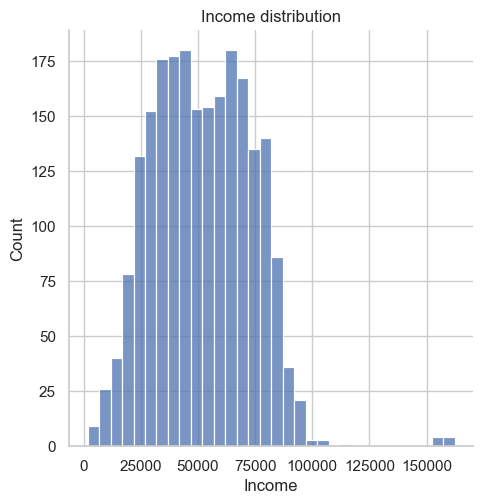

In [56]:
sns.displot(df['Income'])
plt.title("Income distribution");
plt.xlabel("Income");

#### Remarks:
- The distrubution of the customers income is relatively balance below and above the median income (~50K)
- The income mainly lies within the IQR of about 35K - 50K
- There is a few exceptionally high income above 150k. 

## 3.4 KIDS & TEENS AT HOME

In [58]:
#create a new column that sums the number of non-adult at home
df['KidTeenhome'] = df['Kidhome'] + df['Teenhome']

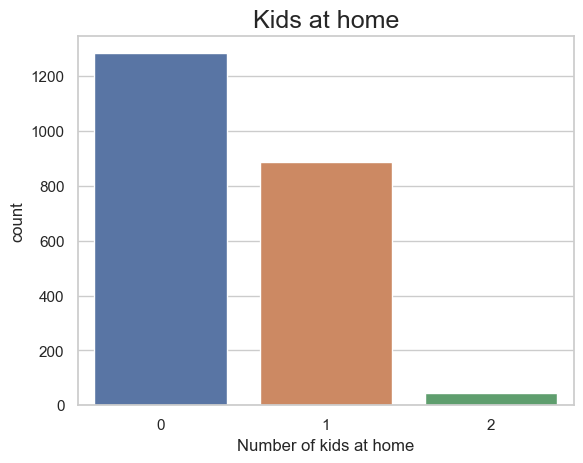

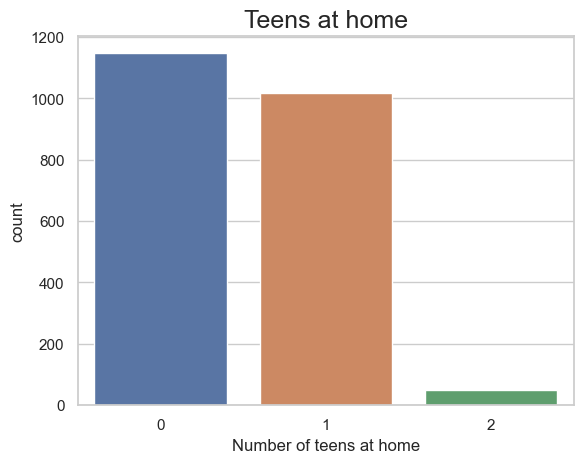

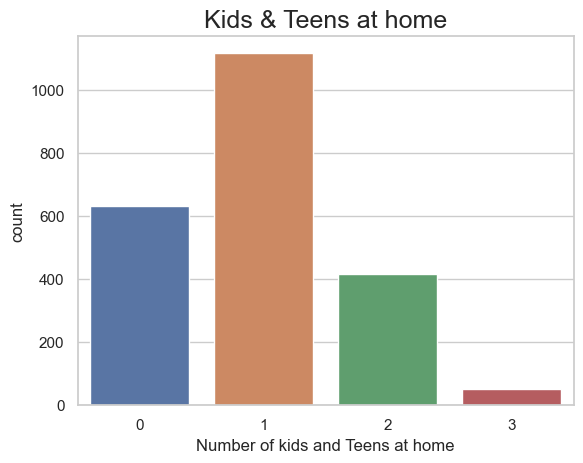

In [59]:
sns.countplot(x='Kidhome', data=df)
plt.title("Kids at home",fontsize = 18)
plt.xlabel("Number of kids at home",fontsize=12);
plt.show();
sns.countplot(x='Teenhome', data=df)
plt.title("Teens at home",fontsize = 18)
plt.xlabel("Number of teens at home",fontsize=12);
plt.show();
sns.countplot(x='KidTeenhome', data=df)
plt.title("Kids & Teens at home",fontsize = 18)
plt.xlabel("Number of kids and Teens at home",fontsize=12);

#### Remarks:
- Close to half of the customers do have have a kid at home
- Close to half of the customers do have have a teen at home
- Majority (~70%) have atleast a teen or a kid at home

## 3.5 RECENCY & COMPLAIN
- <code>Recency</code>: Number of days since customer's last purchase
- <code>Complain</code>: 1 if the customer complained in the last 2 years, 0 otherwise

In [60]:
df['Complain'].value_counts()

0    2195
1      21
Name: Complain, dtype: int64

In [61]:
df['Recency'].describe()

count    2216.000000
mean       49.012635
std        28.948352
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

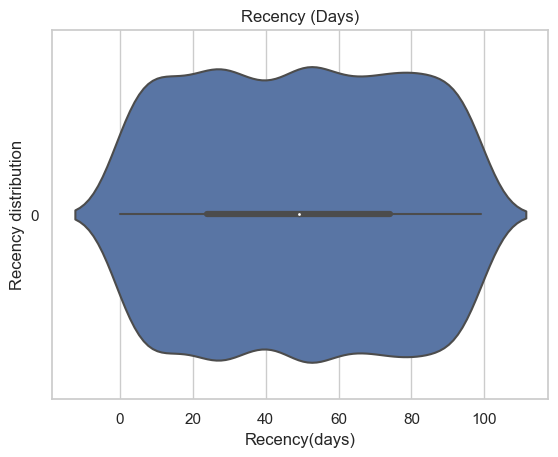

In [62]:
sns.violinplot(df['Recency'],orient='h')
plt.title("Recency (Days)")
plt.ylabel("Recency distribution");
plt.xlabel("Recency(days)");

#### Remarks:
- Only 21 customers complained in the past 2 years
- the Recency (customer last purchase) is relatively evenly distributed from 10 to 100 days

## 3.6 EDUCATION & RELATIONSHIP

In [63]:
df['Education'].value_counts()

Graduate     1116
Post_grad     846
Undergrad     254
Name: Education, dtype: int64

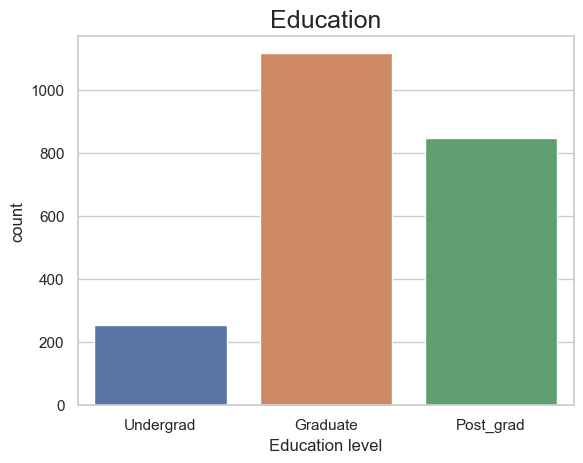

In [57]:
sns.countplot(x='Education', data=df_copy, order = ['Undergrad', 'Graduate', 'Post_grad'])
plt.title("Education",fontsize = 18)
plt.xlabel("Education level",fontsize=12);

In [65]:
df['Relationship_status'].value_counts()

Attached      1430
Unattached     786
Name: Relationship_status, dtype: int64

In [66]:
df['Relationship_status'].value_counts(normalize=True)

Attached      0.645307
Unattached    0.354693
Name: Relationship_status, dtype: float64

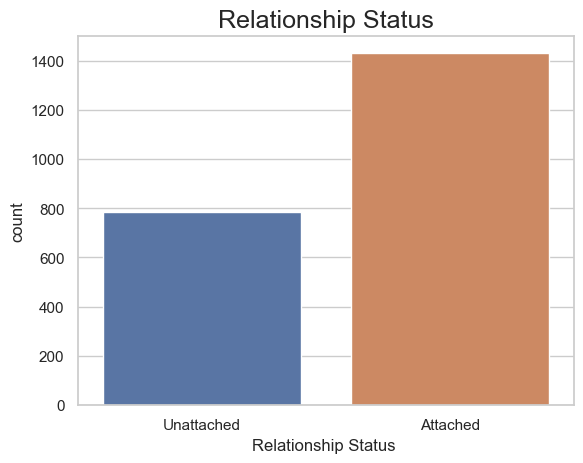

In [67]:
sns.countplot(x='Relationship_status', data=df_copy)
plt.title("Relationship Status",fontsize = 18)
plt.xlabel("Relationship Status ",fontsize=12);

In [68]:
pd.crosstab(columns=df['Education'], index=df['Relationship_status'])


Education,Graduate,Post_grad,Undergrad
Relationship_status,,,
Attached,714,546,170
Unattached,402,300,84


#### Remarks:
- There is highest number of customers who are 'Graduate'
- Majority of the customers are 'Attached'
- There is highest frequency in customers who are at least 'Graduate' and 'Attached'

## 3.7 CUSTOMER DEMOGRAPHIC SUMMARY

|Demographic|Description|
|---|---|
|ENROLLMENT|Most of the months observed 90-110 customers enrollment per month|
|AGE|<li>The most frequent age ranged around 35 to 50, followed by 55 to 70<li>There are a couple of senior customers with age >100|
|INCOME|<li>The distrubution of the customers income is relatively balance below and above the median income (~50K)<li>The income mainly lies within the IQR of about 35K - 50K<li>There is a few exceptionally high income above 150k.|
|KIDS & TEENS AT HOME|<li>Around half the customers have kid(s) at home.<li>Around half the customers have teen(s) at home.<li>Aroud 30% of the customers do have any kid or teen at home|
|RECENCY OF PURCHASE|Recency (customer last purchase) is relatively evenly distributed from 10 to 100 days|
|COMPLAIN| only 21 customers made a complain in the last 2 years|
|EDUCATION|<li>Graduate makes up majority of the customers<li>Undergrates is the smallest education group among customers|
|RELATIONSHIP|~65% customers are Attached|


**Changes to the data features**
1. Replaced <code>Enrollment_date</code> with <code>Days_enrolled</code>
1. Replaced <code>Year_Birth</code> with <code>Age</code>

<code>Days_enrolled</code>: Number of days since customer has been enrolled with the company (NEW)<br>
<code>Age</code>: Customer's age(NEW)

# PART 4: EDA - CONSUMER DEMOGRAPHIC AND BEHAVIOUR

This segment aims to analyse across consumer demographic and their behavious together

## 4.1 CORRELATION

In [69]:
corr_df = df.corr(numeric_only=True).abs()
# replace all integer 1 values with NaN
corr_df.replace(1, np.nan, inplace=True)
corr_df.max()[corr_df.max()<0.5]

ID                   0.044376
Recency              0.199766
NumDealsPurchases    0.436076
AcceptedCmp3         0.429892
AcceptedCmp2         0.418151
Complain             0.040978
Days_enrolled        0.276016
Age                  0.350791
dtype: float64

**Comments**

Let's drop some of these columns that appear to have the least relations with other features - <code>ID, Recency, Complain, Days_enrolled </code>-  as they would be least informative and useful is customer segmentation

In [70]:
print(f"Number of columns before {len(df.columns)}")
df.drop(columns = ['ID', 'Recency', 'Complain','Days_enrolled'],
       inplace = True)
print(f"Number of columns after {len(df.columns)}")


Number of columns before 31
Number of columns after 27


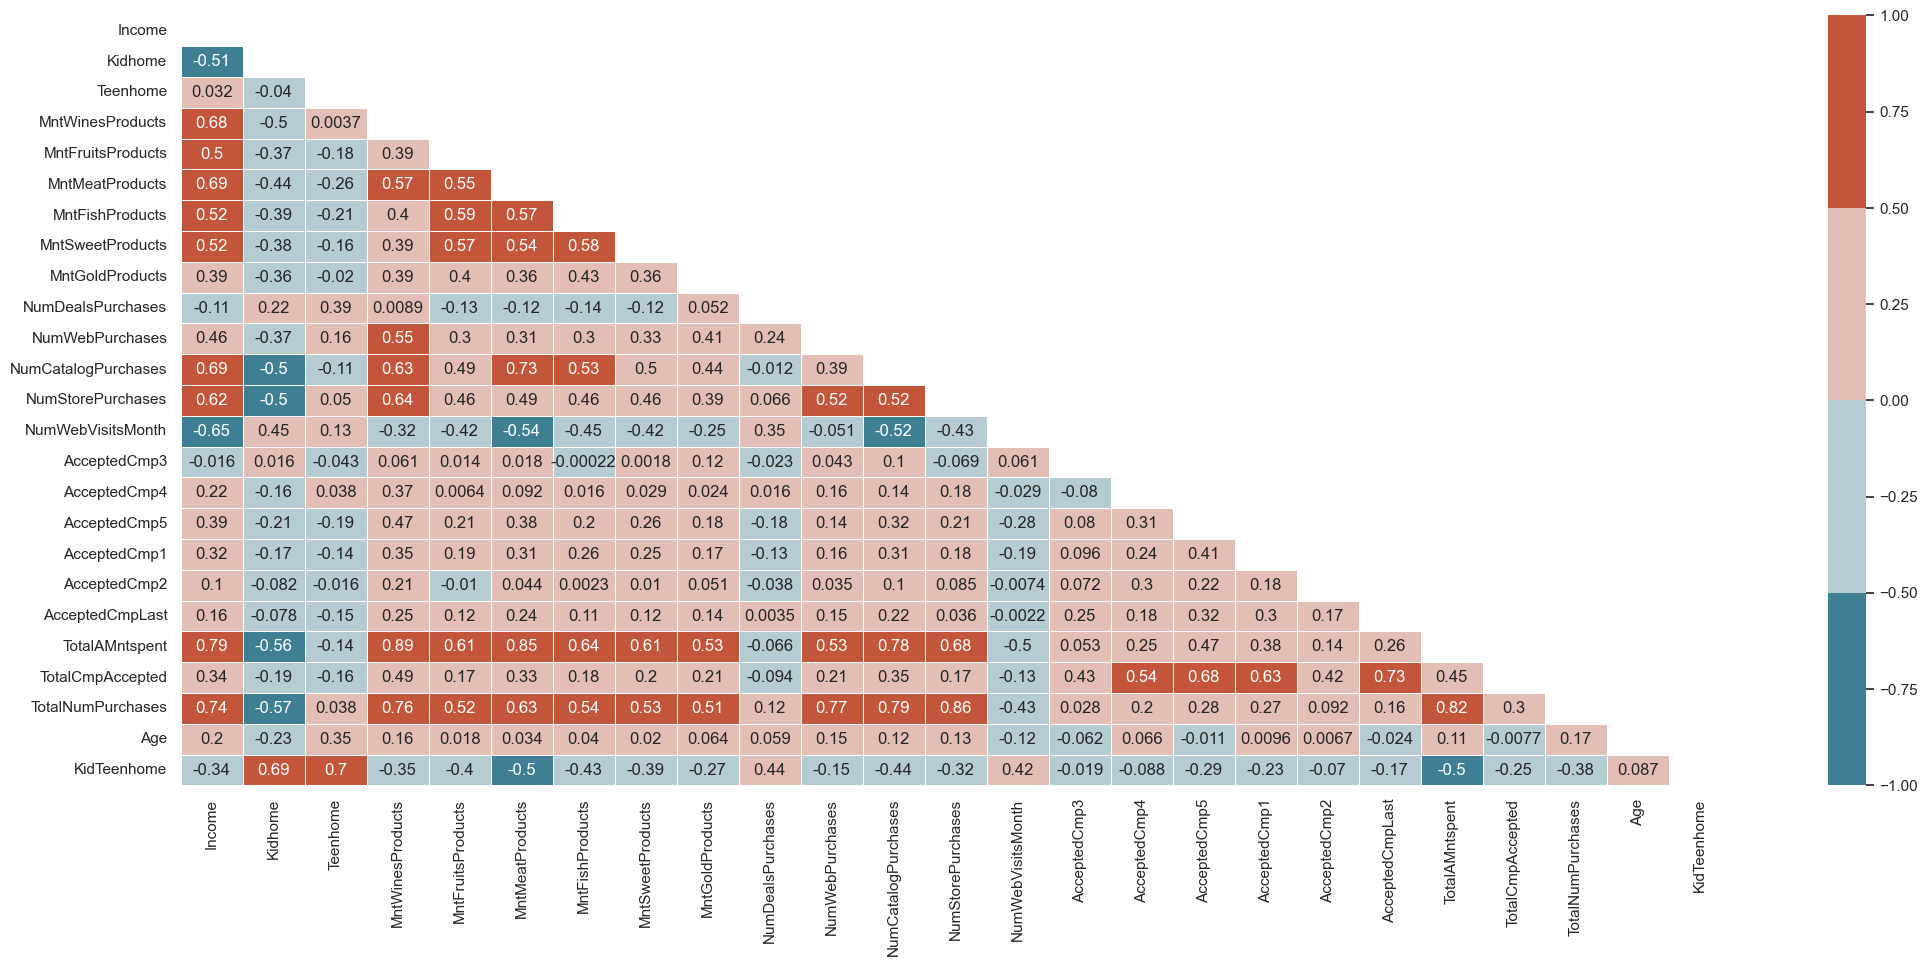

In [71]:
fig=plt.figure(figsize = (25,10))
plot_correlation(df)

#### Remarks:
   
    
||Observation|Remarks|
|---|---|---|
|Significant Relation with Income|Income appear to have many many significant positive correlations with Purchases and Expenses related columns (r>5)|This makes sense as higher income consumers have higher spending power to have higher expenses and more purchases.|
|Kids & Teens at home|Consumer with kid/teen:<br>(1) have lower amount spent on Meat products (r = -0.5)<br>(2) have lower total amout spent (r = -0.5)|This is possibly explained by their need to balance their financial resources with other expenses related in raising their child/teen|
|Campaigns|The Total campaigns offers accepted showed significant correlationship with acceptance of Campaigne 1, 4, 5 and the last campaign|Meaning customers who have higher total numbers of campaigns offer acceptance tend to accept offers by these sepcific campaign|
|Place of purchase|<li>Customers who tend to have higher Store purchases also have higher Web purchases and Catalog purchases (r>0.5)<li>That relationship between Web purchases and Catalog purchases is not as strong (r = 0.4)<li>It is also noted number of web visits last month has signigicant inverse correlation with number Catalog purchases (r = -0.52)|<li>Given that Store is most popular place of purchase, it is reasonable to relate high Store purchases are consumers who have higher purchases generally even in other places.<li>Customers who have higher web visits would less likely to make Catalog purchase, likely because they will more likely opt for Web purchase|

## 4.2 EDUCATION,INCOME VS EXPENDITURE, PURCHASES

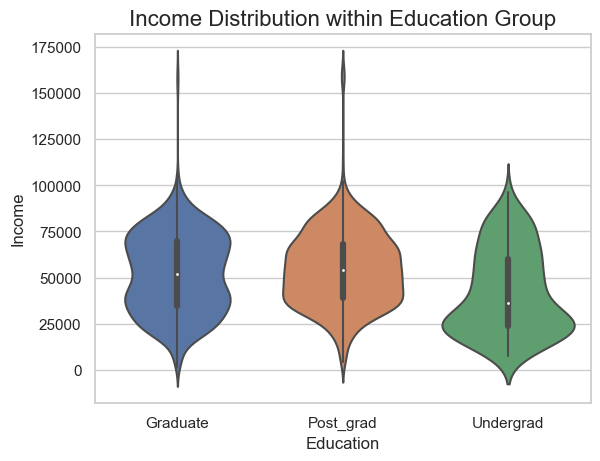

In [79]:
sns.violinplot(data = df,
               y = 'Income',
               x = 'Education')
plt.title('Income Distribution within Education Group', fontsize=16);

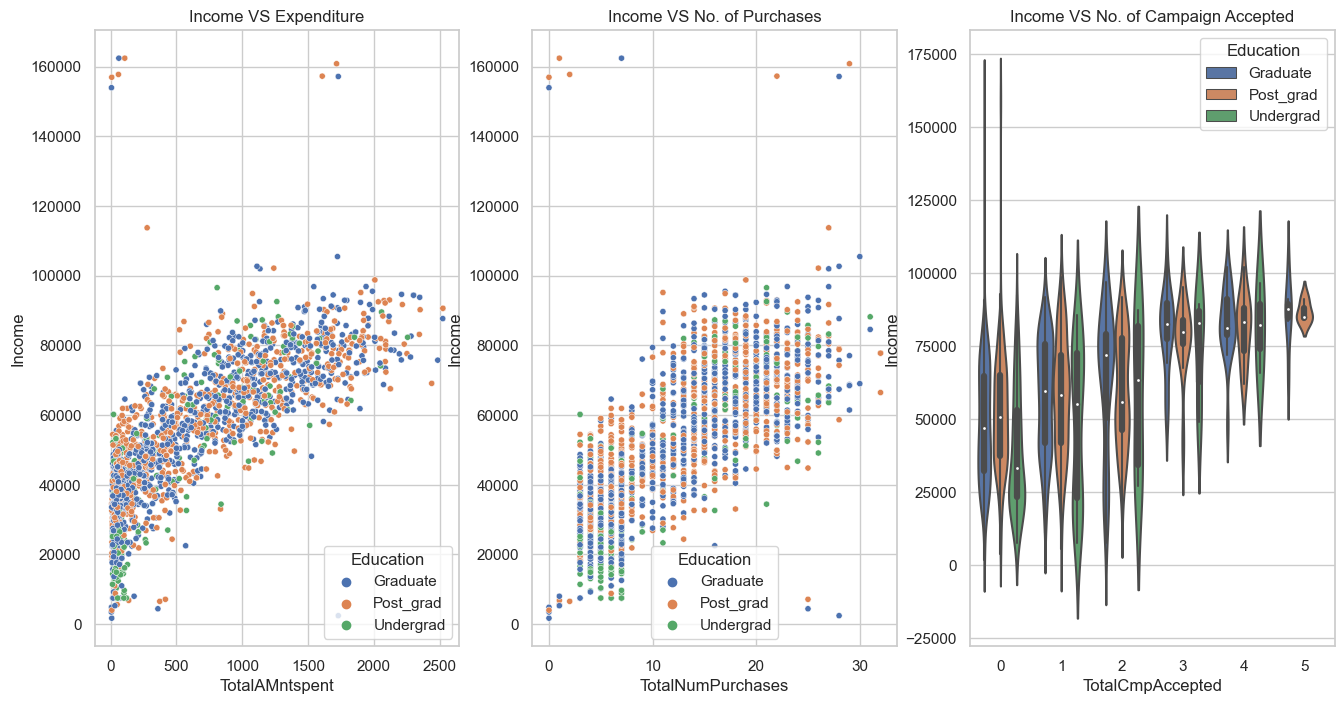

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))
sns.scatterplot(data = df,
                y = 'Income',
                x = 'TotalAMntspent',
                hue = 'Education',
                ax = axes[0],
                s = 20)
axes[0].set_title('Income VS Expenditure')

sns.scatterplot(data = df,
                y = 'Income',
                x = 'TotalNumPurchases',
                hue = 'Education',
                ax = axes[1],
                s = 20)
axes[1].set_title('Income VS No. of Purchases')

sns.violinplot(data = df,
               y = 'Income',
               x = 'TotalCmpAccepted',
               hue = 'Education',
               ax = axes[2])
axes[2].set_title('Income VS No. of Campaign Accepted')
plt.show();

#### Remarks:
   
1. <code>Undergrad</code> have higher proportion customers with income <3K, and lower proortion of custoemrs with income >5K, compared to the other two education group.
1. <code>Post-grad</code> and <code>Graduate</code> have relatively similar Income distribution
1. Apart from the previously observed relation between income & expenditure, income & purchases -- there is no significant difference among the education groups
1. The income range is narrower, ranging 50-100K among customers who accept 3 or more campaigns 

# Part 5: NOTEBOOK SUMMARY

**What have we achieved**:
1. Cleaning data
1. Analyse the various features (EDA)
1. Removed some less useful features identified during EDA
1. Created some columns

## Changes:
**Changes to the consumer behaviour features**<br>
New columns:
- <code>TotalAMntspent</code>: Total amount spend in last 2 years (NEW)
- <code>TotalCmpAccepted</code>: Number of offers accepted by customer (NEW)
- <code>TotalNumPurchases</code>: Total number of purchases made by a customer (NEW)

**Changes to the Ddemographic features**
1. Replaced <code>Enrollment_date</code> with <code>Days_enrolled</code>
1. Replaced <code>Year_Birth</code> with <code>Age</code>

## EDA Summary:
**CONSUMER BEHAVIOUR SUMMARY**

|Behaviour|Description|
|---|---|
|EXPENDITURE|<li>There is a bulk of customers spending <500 in last 2 years<li>There is a bulk of customers spending above 900 in last 2 years<li>There is significantly more expenditure on WINE & MEAT compared to other product types|
|CAMPAIGN OFFERS|<li> Generally acceptance rate for all campaign offers are low (avg 160)<li>73% Customers did not accept any campaigns<li>Last Campaign received the highest acceptance (300+)|
|PLACE OF PUCHASE|<li>Store is the most popular place of purchase (12.8K purchases in last 2years<li>Majority (64%) of customers viewed the website 5-10 times last month<li>There is a bulk of customers making 2-6 purchases in past 2yrs<li>There is a bulk of customers making 10-25 purchases in past 2yrs|
    
**CUSTOMER DEMOGRAPHIC SUMMARY**

|Demographic|Description|
|---|---|
|ENROLLMENT|Most of the months observed 90-110 customers enrollment per month|
|AGE|<li>The most frequent age ranged around 35 to 50, followed by 55 to 70<li>There are a couple of senior customers with age >100|
|INCOME|<li>The distrubution of the customers income is relatively balance below and above the median income (~50K)<li>The income mainly lies within the IQR of about 35K - 50K<li>There is a few exceptionally high income above 150k.|
|KIDS & TEENS AT HOME|<li>Around half the customers have kid(s) at home.<li>Around half the customers have teen(s) at home.<li>Aroud 30% of the customers do have any kid or teen at home|
|RECENCY OF PURCHASE|Recency (customer last purchase) is relatively evenly distributed from 10 to 100 days|
|COMPLAIN| only 21 customers made a complain in the last 2 years|
|EDUCATION|<li>Graduate makes up majority of the customers<li>Undergrates is the smallest education group among customers|
|RELATIONSHIP|~65% customers are Attached|
    
**CORRELATIONS SUMMARY**
||Observation|Remarks|
|---|---|---|
|Significant Relation with Income|Income appear to have many many significant positive correlations with Purchases and Expenses related columns (r>5)|This makes sense as higher income consumers have higher spending power to have higher expenses and more purchases.|
|Kids & Teens at home|Consumer with kid/teen:<br>(1) have lower amount spent on Meat products (r = -0.5)<br>(2) have lower total amout spent (r = -0.5)|This is possibly explained by their need to balance their financial resources with other expenses related in raising their child/teen|
|Campaigns|The Total campaigns offers accepted showed significant correlationship with acceptance of Campaigne 1, 4, 5 and the last campaign|Meaning customers who have higher total numbers of campaigns offer acceptance tend to accept offers by these sepcific campaign|
|Place of purchase|<li>Customers who tend to have higher Store purchases also have higher Web purchases and Catalog purchases (r>0.5)<li>That relationship between Web purchases and Catalog purchases is not as strong (r = 0.4)<li>It is also noted number of web visits last month has signigicant inverse correlation with number Catalog purchases (r = -0.52)|<li>Given that Store is most popular place of purchase, it is reasonable to relate high Store purchases are consumers who have higher purchases generally even in other places.<li>Customers who have higher web visits would less likely to make Catalog purchase, likely because they will more likely opt for Web purchase|

## What's next
We will do a quick look at the resulting data we have, and move on to clustering in the next nextbook.

In [74]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'MntWinesProducts',
       'MntFruitsProducts', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProducts', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmpLast',
       'Relationship_status', 'TotalAMntspent', 'TotalCmpAccepted',
       'TotalNumPurchases', 'Age', 'KidTeenhome'],
      dtype='object')

In [75]:
df.shape

(2216, 27)

In [76]:
df.to_csv('Data/cleaned_data.csv',index = False)